In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel('/content/data_sa_crime_q1_q2_q3_2024-25.xlsx')

In [3]:
data.head()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count,Region
0,2024-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,3,NaN
1,2024-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,SERIOUS CRIMINAL TRESPASS,SCT - Non Residence,1,NaN
2,2024-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,2,NaN
3,2024-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1,NaN
4,2024-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from shop,4,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72636 entries, 0 to 72635
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Reported Date                72636 non-null  datetime64[ns]
 1   Suburb - Incident            72402 non-null  object        
 2   Postcode - Incident          72385 non-null  object        
 3   Offence Level 1 Description  72636 non-null  object        
 4   Offence Level 2 Description  72636 non-null  object        
 5   Offence Level 3 Description  72636 non-null  object        
 6   Offence count                72636 non-null  int64         
 7   Region                       0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 4.4+ MB


In [5]:
data.describe()

,Reported Date,Offence count,Region
count,72636,72636.000000,0.0
mean,2024-11-15 19:44:36.953576448,1.236095,NaN
min,2024-07-01 00:00:00,1.000000,NaN
25%,2024-09-10 00:00:00,1.000000,NaN
50%,2024-11-16 00:00:00,1.000000,NaN
75%,2025-01-22 00:00:00,1.000000,NaN
max,2025-03-31 00:00:00,17.000000,NaN
std,NaN,0.736151,NaN


In [6]:
data['Postcode - Incident'].unique()

array([5000, 5950, 5014, 5173, 5009, 5221, 5114, 5010, 5117, 5012, 5374,
       5211, 5042, 5084, 5110, 5268, 5048, 5007, 5321, 5164, 5165, 5085,
       5152, 5113, 5008, 5063, 5111, 5039, 5112, 5253, 5116, 5019, 5121,
       5416, 5023, 5070, 5159, 5025, 5233, 5024, 5118, 5037, 5045, 5044,
       5064, 5125, 5214, 5163, 5069, 5073, 5086, 5033, 5098, 5554, 5067,
       5035, 5223, 5275, 5172, 5016, 5065, 5250, 5160, 5333, 5272, 5043,
       5095, 5092, 5162, 5251, 5290, 5115, 5083, 5074, 5168, 5006, 5018,
       'NOT DISCLOSED', 5355, 5046, 5107, 5096, 5108, 5700, 5606, 5540,
       5550, 5433, 5161, 5109, 5169, 5174, 5158, 5097, 5011, 5680, 5126,
       5017, 5091, 5062, 5031, 5032, 5061, 5081, 5120, 5330, 5034, 5021,
       5600, 5608, 5351, 5087, 5291, 5203, 5242, 5345, 5051, 5690, 5041,
       5723, 5265, 5094, 5090, 5373, 5068, 5171, 5280, 5271, 5040, 5106,
       5422, 5038, 5015, 5082, 5341, 5371, 3182, 5127, 872, 5461, 5560,
       5344, 5022, 5245, 5153, 5238, 5202, 5276, 5166

In [7]:
len(data['Postcode - Incident'].unique())

364

In [8]:
len(data['Suburb - Incident'].unique())

1172

In [9]:
data.isna().sum()

,0
Reported Date,0
Suburb - Incident,234
Postcode - Incident,251
Offence Level 1 Description,0
Offence Level 2 Description,0
Offence Level 3 Description,0
Offence count,0
Region,72636


In [10]:
for col in data.columns:
    print(col, data[col].value_counts())

Reported Date Reported Date
2024-12-09    345
2025-03-11    332
2024-11-11    330
2024-12-30    329
2025-01-06    326
             ... 
2024-07-14    203
2024-10-06    195
2024-09-07    190
2024-08-03    186
2024-12-25    163
Name: count, Length: 274, dtype: int64
Suburb - Incident Suburb - Incident
ADELAIDE              2541
PORT AUGUSTA          1315
MOUNT GAMBIER         1045
PORT LINCOLN           967
SALISBURY              858
                      ... 
BAROSSA GOLDFIELDS       1
HYNAM                    1
KEPPOCH                  1
PANDIE PANDIE            1
BRUKUNGA                 1
Name: count, Length: 1171, dtype: int64
Postcode - Incident Postcode - Incident
5000    2561
5108    2331
5112    2148
5700    1998
5114    1853
        ... 
4502       1
3020       1
3184       1
2768       1
5144       1
Name: count, Length: 363, dtype: int64
Offence Level 1 Description Offence Level 1 Description
OFFENCES AGAINST PROPERTY      54637
OFFENCES AGAINST THE PERSON    17999
Name: coun

In [11]:
data['Reported Date']=pd.to_datetime(data['Reported Date'], dayfirst=True)

In [12]:
data['Month']= data['Reported Date'].dt.month_name()

In [13]:
data.head()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count,Region,Month
0,2024-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,3,NaN,July
1,2024-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,SERIOUS CRIMINAL TRESPASS,SCT - Non Residence,1,NaN,July
2,2024-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,2,NaN,July
3,2024-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1,NaN,July
4,2024-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from shop,4,NaN,July


In [14]:
def get_region(postcode):
    if pd.isna(postcode) or postcode == 'NOT DISCLOSED' or postcode == 'UNKNOWN':
        return "UNKNOWN"
    try:
        postcode = int(postcode)
    except ValueError:
        return "UNKNOWN"

    adelaide_postcodes = {
        5000, 5001, 5006, 5007, 5008, 5009, 5010, 5011, 5012, 5013, 5014, 5015, 5016, 5017, 5018, 5019,
        5020, 5021, 5022, 5023, 5024, 5025, 5031, 5032, 5033, 5034, 5035, 5037, 5038, 5039, 5040, 5041,
        5042, 5043, 5044, 5045, 5046, 5047, 5048, 5049, 5050, 5051, 5052, 5061, 5062, 5063, 5064, 5065,
        5066, 5067, 5068, 5069, 5070, 5072, 5073, 5074, 5075, 5076, 5081, 5082, 5083, 5084, 5085, 5086,
        5087, 5088, 5089, 5090, 5091, 5092, 5093, 5094, 5095, 5096, 5097, 5098, 5106, 5107, 5108, 5109,
        5110, 5111, 5112, 5113, 5114, 5115, 5116, 5117, 5118, 5120, 5121, 5125, 5126, 5127, 5131, 5132,
        5133, 5134, 5136, 5137, 5138, 5139, 5140, 5141, 5142, 5144, 5150, 5151, 5152, 5153, 5154, 5155,
        5156, 5157, 5158, 5159, 5160, 5161, 5162, 5163, 5164, 5165, 5166, 5167, 5168, 5169, 5170, 5171,
        5172, 5173, 5174, 5201, 5202, 5231, 5232, 5233, 5234, 5240, 5241, 5242, 5243, 5244, 5245, 5942, 5950
    }

    eyre_postcodes = {
        5602, 5603, 5605, 5606, 5607, 5631, 5633, 5640, 5641, 5650, 5652, 5654, 5655,
        5661, 5670, 5671, 5680, 5690
    }

    kangaroo_island_postcodes = {
        5220, 5221, 5222, 5223
    }

    murraylands_postcodes = {
        5236, 5237, 5238, 5240, 5251, 5252, 5253, 5254, 5259, 5260, 5261, 5264, 5265, 5266,
        5301, 5302, 5303, 5304, 5306, 5307, 5308, 5309, 5310, 5311, 5320, 5321, 5322,
        5330, 5331, 5332, 5333, 5340, 5341, 5342, 5343, 5344, 5345, 5346,
        5353, 5354, 5356, 5357, 5374
    }

    northern_postcodes = {
        5421, 5422, 5431, 5432, 5433, 5434, 5454, 5464, 5470, 5471, 5472, 5473,
        5480, 5481, 5482, 5483, 5485, 5490, 5491, 5493, 5495,
        5521, 5523, 5540,
        5600, 5601, 5608, 5609,
        5700, 5710
    }

    outer_adelaide_postcodes = {
        5118, 5153, 5157, 5201, 5203, 5204, 5210, 5211, 5212, 5213, 5214,
        5244, 5245, 5250, 5251, 5252, 5254, 5255, 5256,
        5330, 5350, 5351, 5352, 5353, 5354, 5355, 5360,
        5371, 5372, 5373, 5374,
        5400, 5401, 5410, 5460,
        5501, 5502
    }

    south_east_postcodes = {
        5157, 5262, 5263, 5267, 5268, 5269,
        5270, 5271, 5272, 5273, 5275, 5277, 5278, 5279,
        5280, 5290, 5291, 5311
    }

    york_lower_north_postcodes = {
        5374, 5381, 5410, 5411, 5412, 5413, 5414, 5415, 5416, 5417, 5418, 5419, 5420,
        5451, 5452, 5453, 5455, 5460, 5461, 5462, 5464,
        5501, 5510, 5520, 5522,
        5550, 5552, 5554, 5555, 5556, 5558,
        5560,
        5570, 5571, 5572, 5573, 5575, 5576, 5577,
        5580, 5581, 5582, 5583,
        5642
    }

    if postcode in adelaide_postcodes:
        return "Adelaide"
    elif postcode in eyre_postcodes:
        return "Eyre"
    elif postcode in kangaroo_island_postcodes:
        return "Kangaroo Island"
    elif postcode in murraylands_postcodes:
        return "Murraylands"
    elif postcode in northern_postcodes:
        return "Northern"
    elif postcode in outer_adelaide_postcodes:
        return "Outer Adelaide"
    elif postcode in south_east_postcodes:
        return "South East"
    elif postcode in york_lower_north_postcodes:
        return "Yorke & Lower North"
    else:
        return "UNKNOWN"

In [15]:
data['Postcode - Incident'] = data['Postcode - Incident'].fillna('UNKNOWN')
data['Postcode - Incident'] = data['Postcode - Incident'].replace('NOT DISCLOSED', 'UNKNOWN')
data['Region'] = data['Postcode - Incident'].apply(get_region)

In [16]:
data['Region'].value_counts()

,count
Region,
Adelaide,56274
Northern,4794
Murraylands,3015
UNKNOWN,2020
Eyre,1839
South East,1754
Outer Adelaide,1703
Yorke & Lower North,1156
Kangaroo Island,81


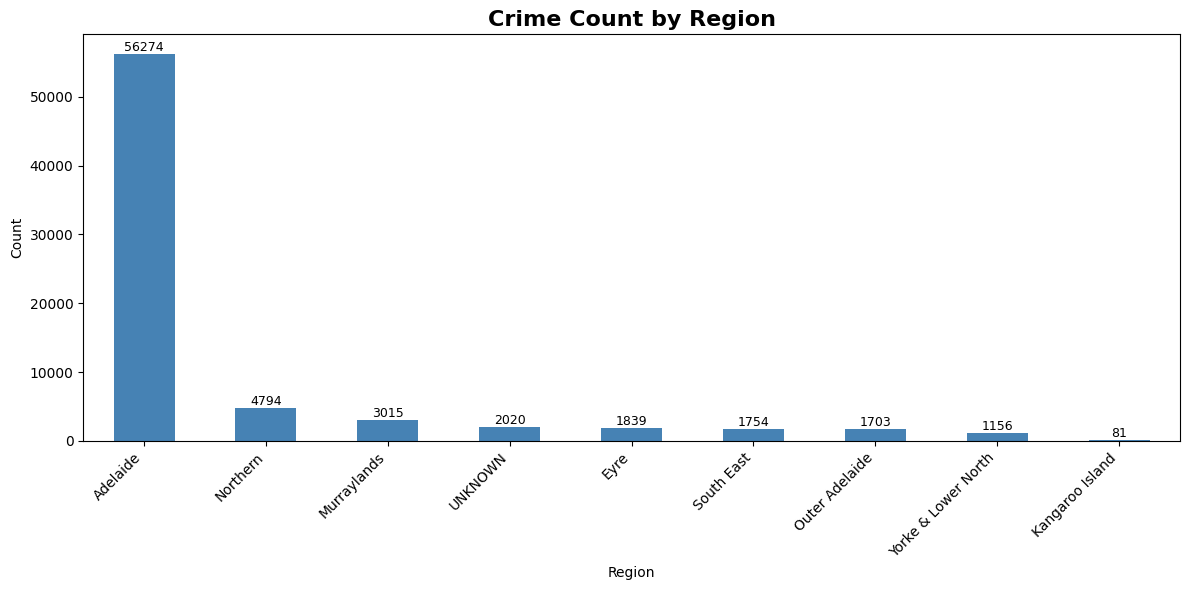

In [17]:
region_counts = data['Region'].value_counts()

plt.figure(figsize=(12,6))
bars = region_counts.plot(kind='bar', color='steelblue')

plt.ylabel('Count')
plt.title('Crime Count by Region', fontsize=16, fontweight='bold')
plt.xlabel('Region')
plt.xticks(rotation=45, ha='right')

# Add count labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x position: center of the bar
        height,                             # y position: top of the bar
        f'{int(height)}',                   # label text
        ha='center', va='bottom', fontsize=9
    )

plt.tight_layout()
plt.show()

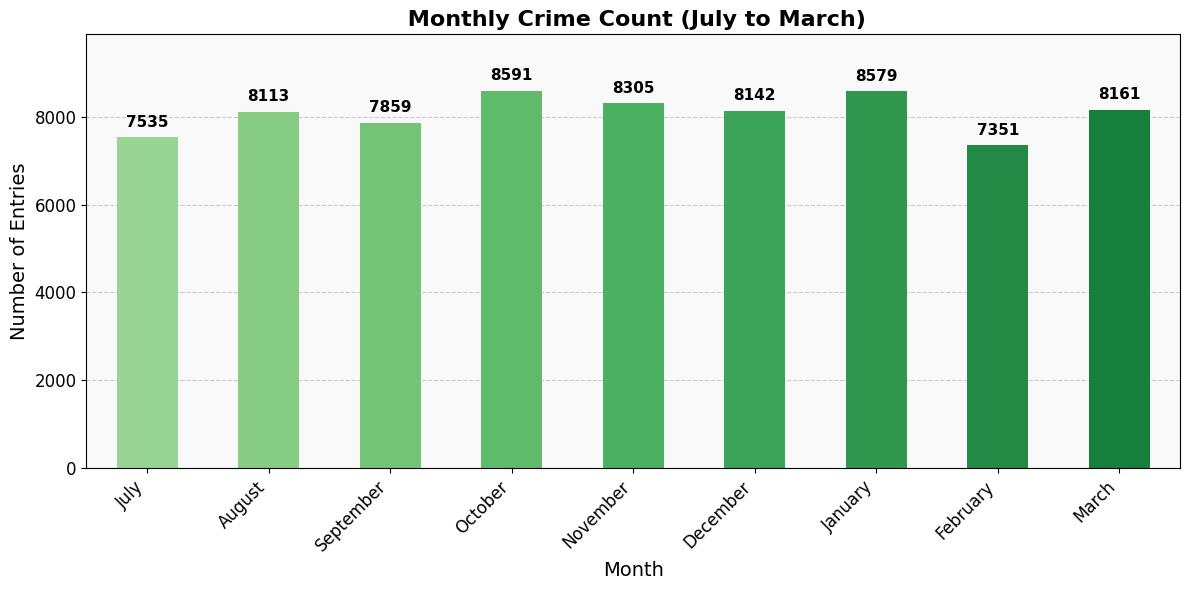

In [18]:
custom_month_order = ['July', 'August', 'September', 'October', 'November', 'December', 'January', 'February', 'March']
data['Month'] = pd.Categorical(data['Month'], categories=custom_month_order, ordered=True)

# Group and sort by custom month order
month_entry_counts = data.groupby("Month").size().reindex(custom_month_order).fillna(0)

# Plotting
plt.figure(figsize=(12, 6))
bars = month_entry_counts.plot(kind='bar', color=plt.cm.Greens(np.linspace(0.4, 0.8, len(month_entry_counts))))

plt.title(" Monthly Crime Count (July to March)", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Entries", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.gca().set_axisbelow(True)
plt.gca().set_facecolor('#f9f9f9')
plt.ylim(0, month_entry_counts.max() * 1.15)  # Add some headroom on y-axis

# Add count labels on top of bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + month_entry_counts.max() * 0.02,  # small offset above bar
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='semibold'
    )

plt.tight_layout()
plt.show()

In [19]:
 new_df=data['Reported Date'].value_counts()

In [20]:
new_df

,count
Reported Date,
2024-12-09,345
2025-03-11,332
2024-11-11,330
2024-12-30,329
2025-01-06,326
...,...
2024-07-14,203
2024-10-06,195
2024-09-07,190


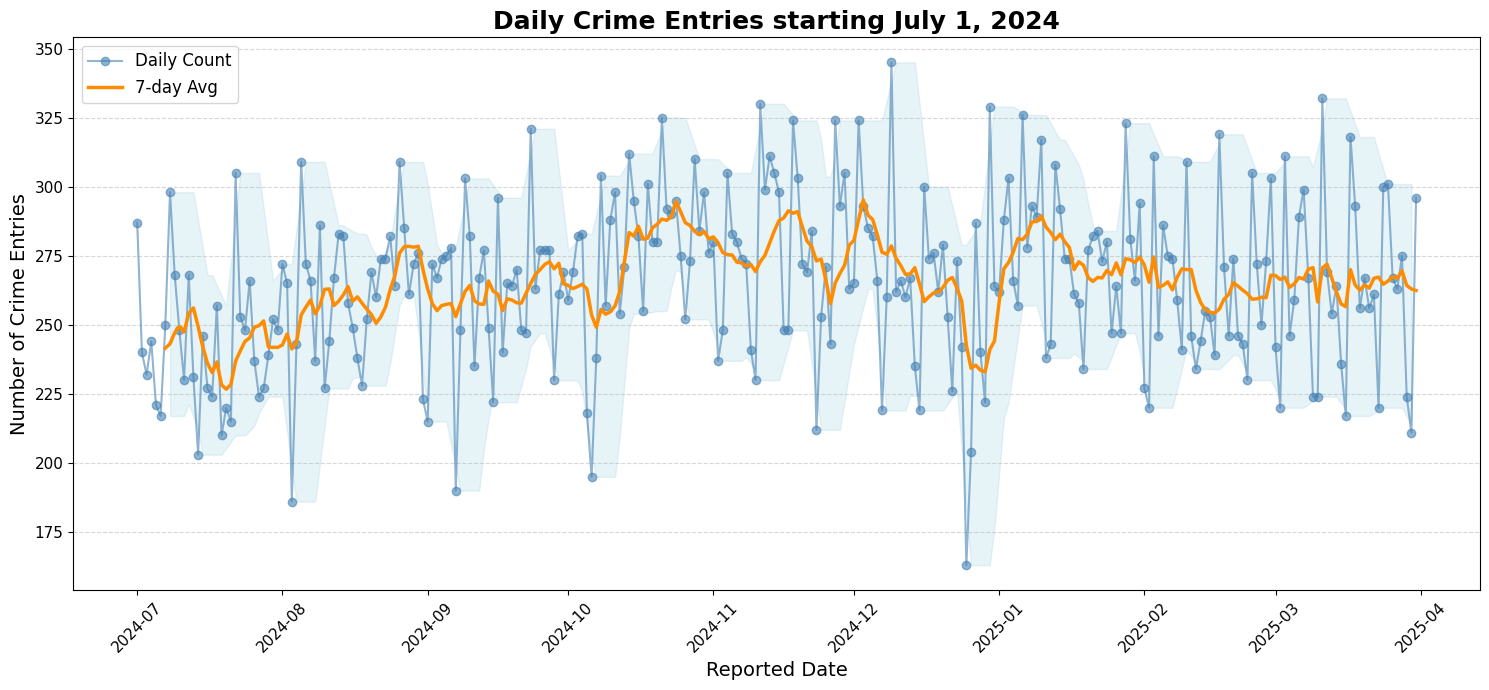

In [21]:
# Convert the Series to a DataFrame and name the columns
new_df = new_df.reset_index()
# new_df.columns = ['Reported Date', 'count'] # This line caused the error

df_filtered = new_df[new_df['Reported Date'] >= '2024-07-01'].sort_values('Reported Date')

# Calculate rolling stats
df_filtered['7-day Avg'] = df_filtered['count'].rolling(window=7).mean()
df_filtered['7-day Min'] = df_filtered['count'].rolling(window=7).min()
df_filtered['7-day Max'] = df_filtered['count'].rolling(window=7).max()

# Smooth the min and max lines with additional rolling mean
df_filtered['Smooth Min'] = df_filtered['7-day Min'].rolling(window=3, center=True).mean()
df_filtered['Smooth Max'] = df_filtered['7-day Max'].rolling(window=3, center=True).mean()

# Plot
plt.figure(figsize=(15, 7))

# Fill smoother area between smoothed min and max
plt.fill_between(df_filtered['Reported Date'],
                 df_filtered['Smooth Min'],
                 df_filtered['Smooth Max'],
                 color='lightblue', alpha=0.3)

# Plot original daily count
plt.plot(df_filtered['Reported Date'], df_filtered['count'],
         marker='o', linestyle='-', color='steelblue', alpha=0.6, label='Daily Count')

# Plot rolling average
plt.plot(df_filtered['Reported Date'], df_filtered['7-day Avg'],
         color='darkorange', linewidth=2.5, label='7-day Avg') # Added label for legend

# Styling
plt.title("Daily Crime Entries starting July 1, 2024", fontsize=18, fontweight='bold')
plt.xlabel("Reported Date", fontsize=14)
plt.ylabel("Number of Crime Entries", fontsize=14)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()

# Show plot
plt.show()

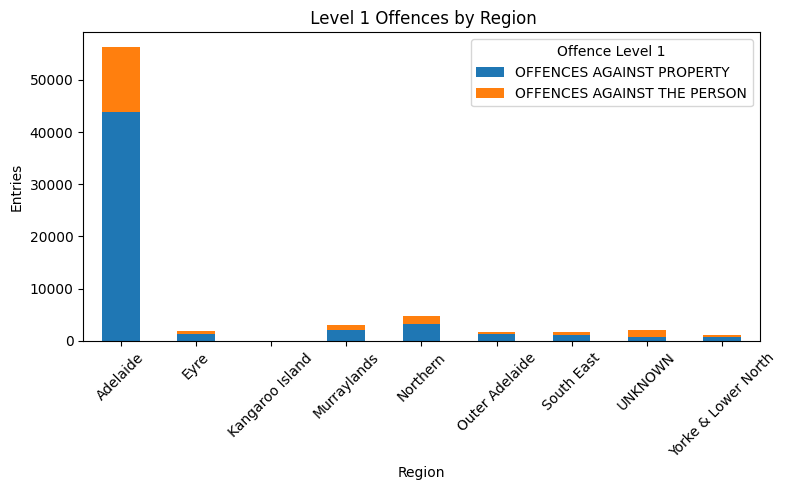

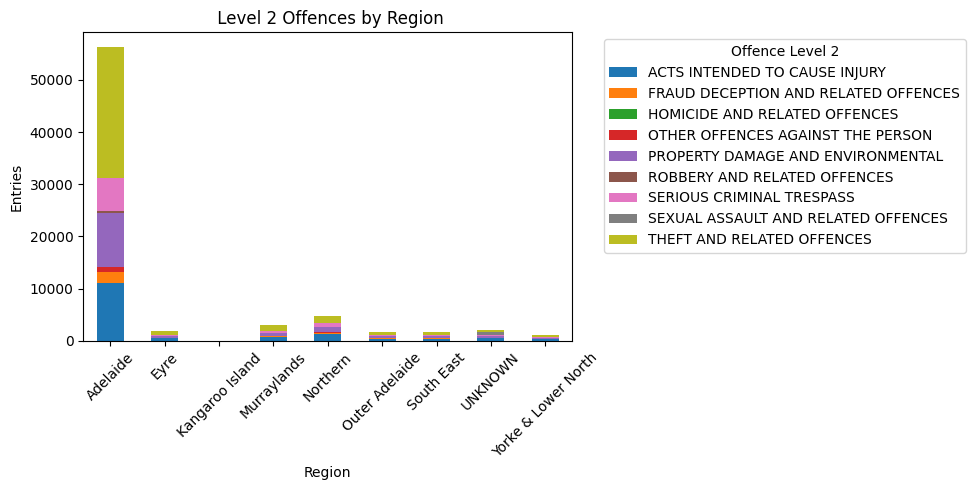

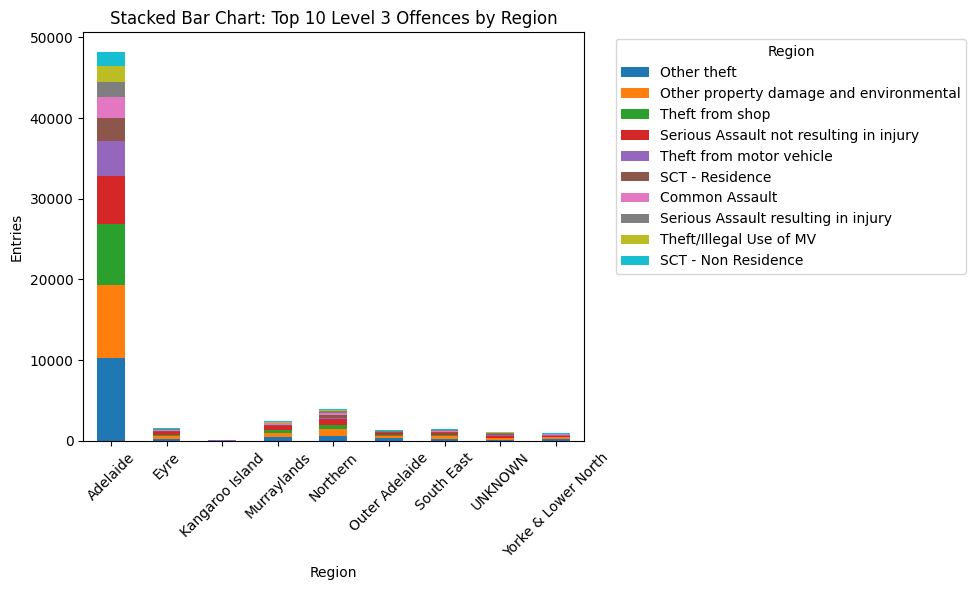

In [22]:
level1_counts = data.groupby(["Region", "Offence Level 1 Description"]).size().unstack(fill_value=0)

level1_counts.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title(" Level 1 Offences by Region")
plt.ylabel("Entries")
plt.xticks(rotation=45)
plt.legend(title="Offence Level 1")
plt.tight_layout()
plt.show()


# ------------------------
# 2. Stacked Bar Chart: Level 2 Offences by Region
# ------------------------
level2_counts = data.groupby(["Region", "Offence Level 2 Description"]).size().unstack(fill_value=0)

level2_counts.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title(" Level 2 Offences by Region")
plt.ylabel("Entries")
plt.xticks(rotation=45)
plt.legend(title="Offence Level 2", bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


# ------------------------
# 3. Stacked Bar Chart: Top 10 Level 3 Offences
# ------------------------
level3_counts = data.groupby(["Region", "Offence Level 3 Description"]).size().unstack(fill_value=0)
top_level3 = level3_counts.sum(axis=0).sort_values(ascending=False).head(10).index
level3_top_counts = level3_counts[top_level3]

level3_top_counts.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Stacked Bar Chart: Top 10 Level 3 Offences by Region")
plt.ylabel("Entries")
plt.xticks(rotation=45)
plt.legend(title="Region", bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

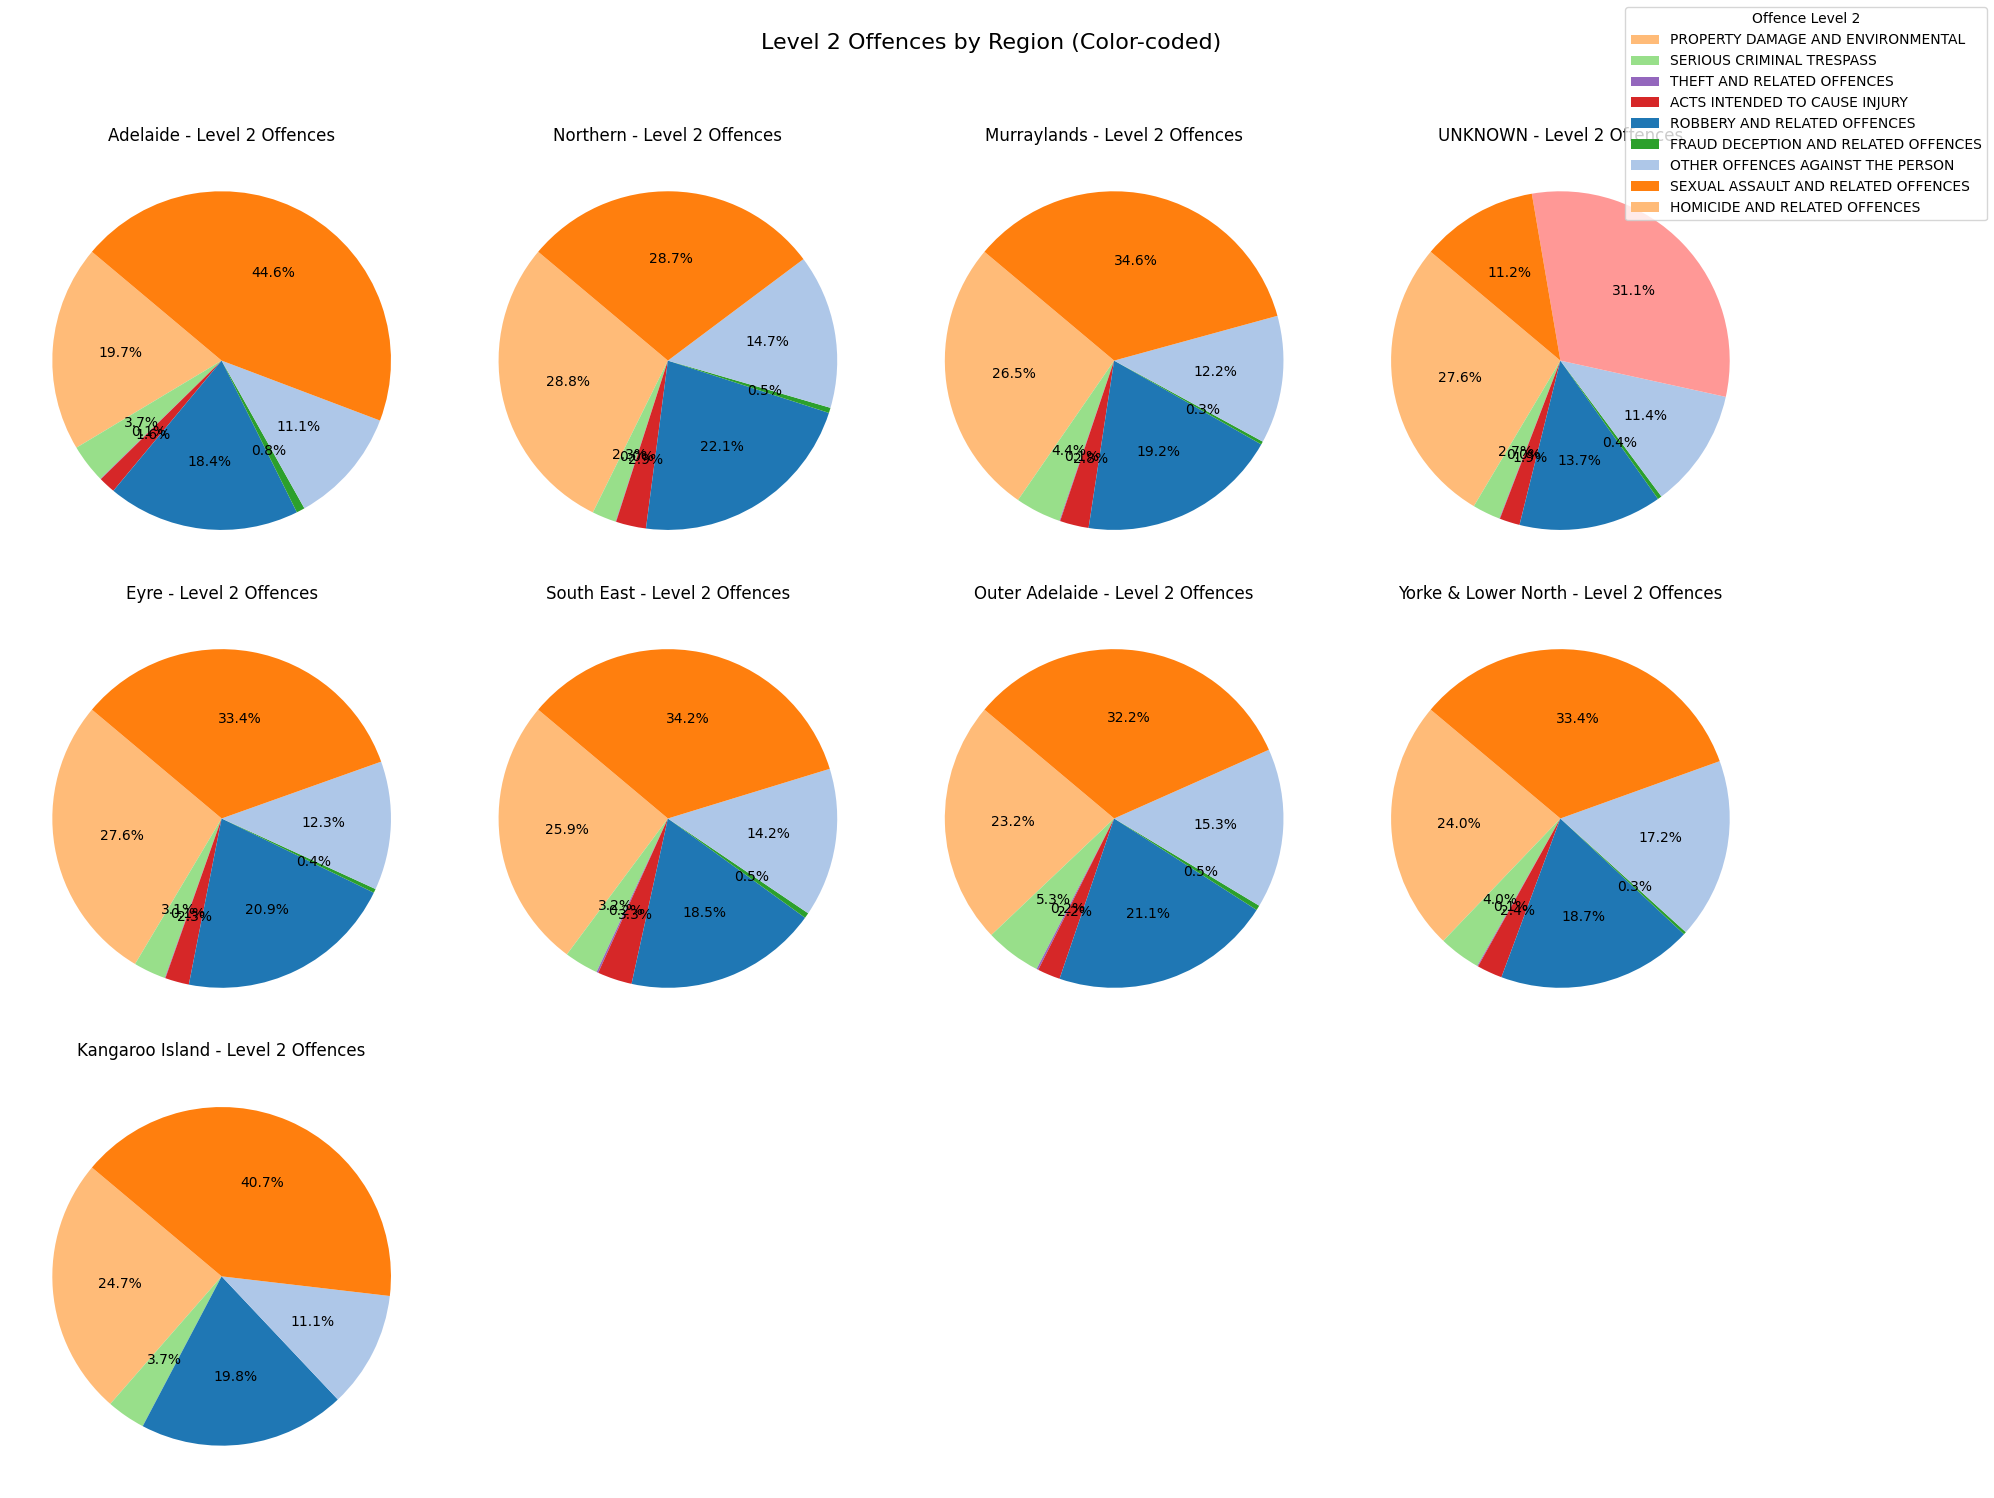

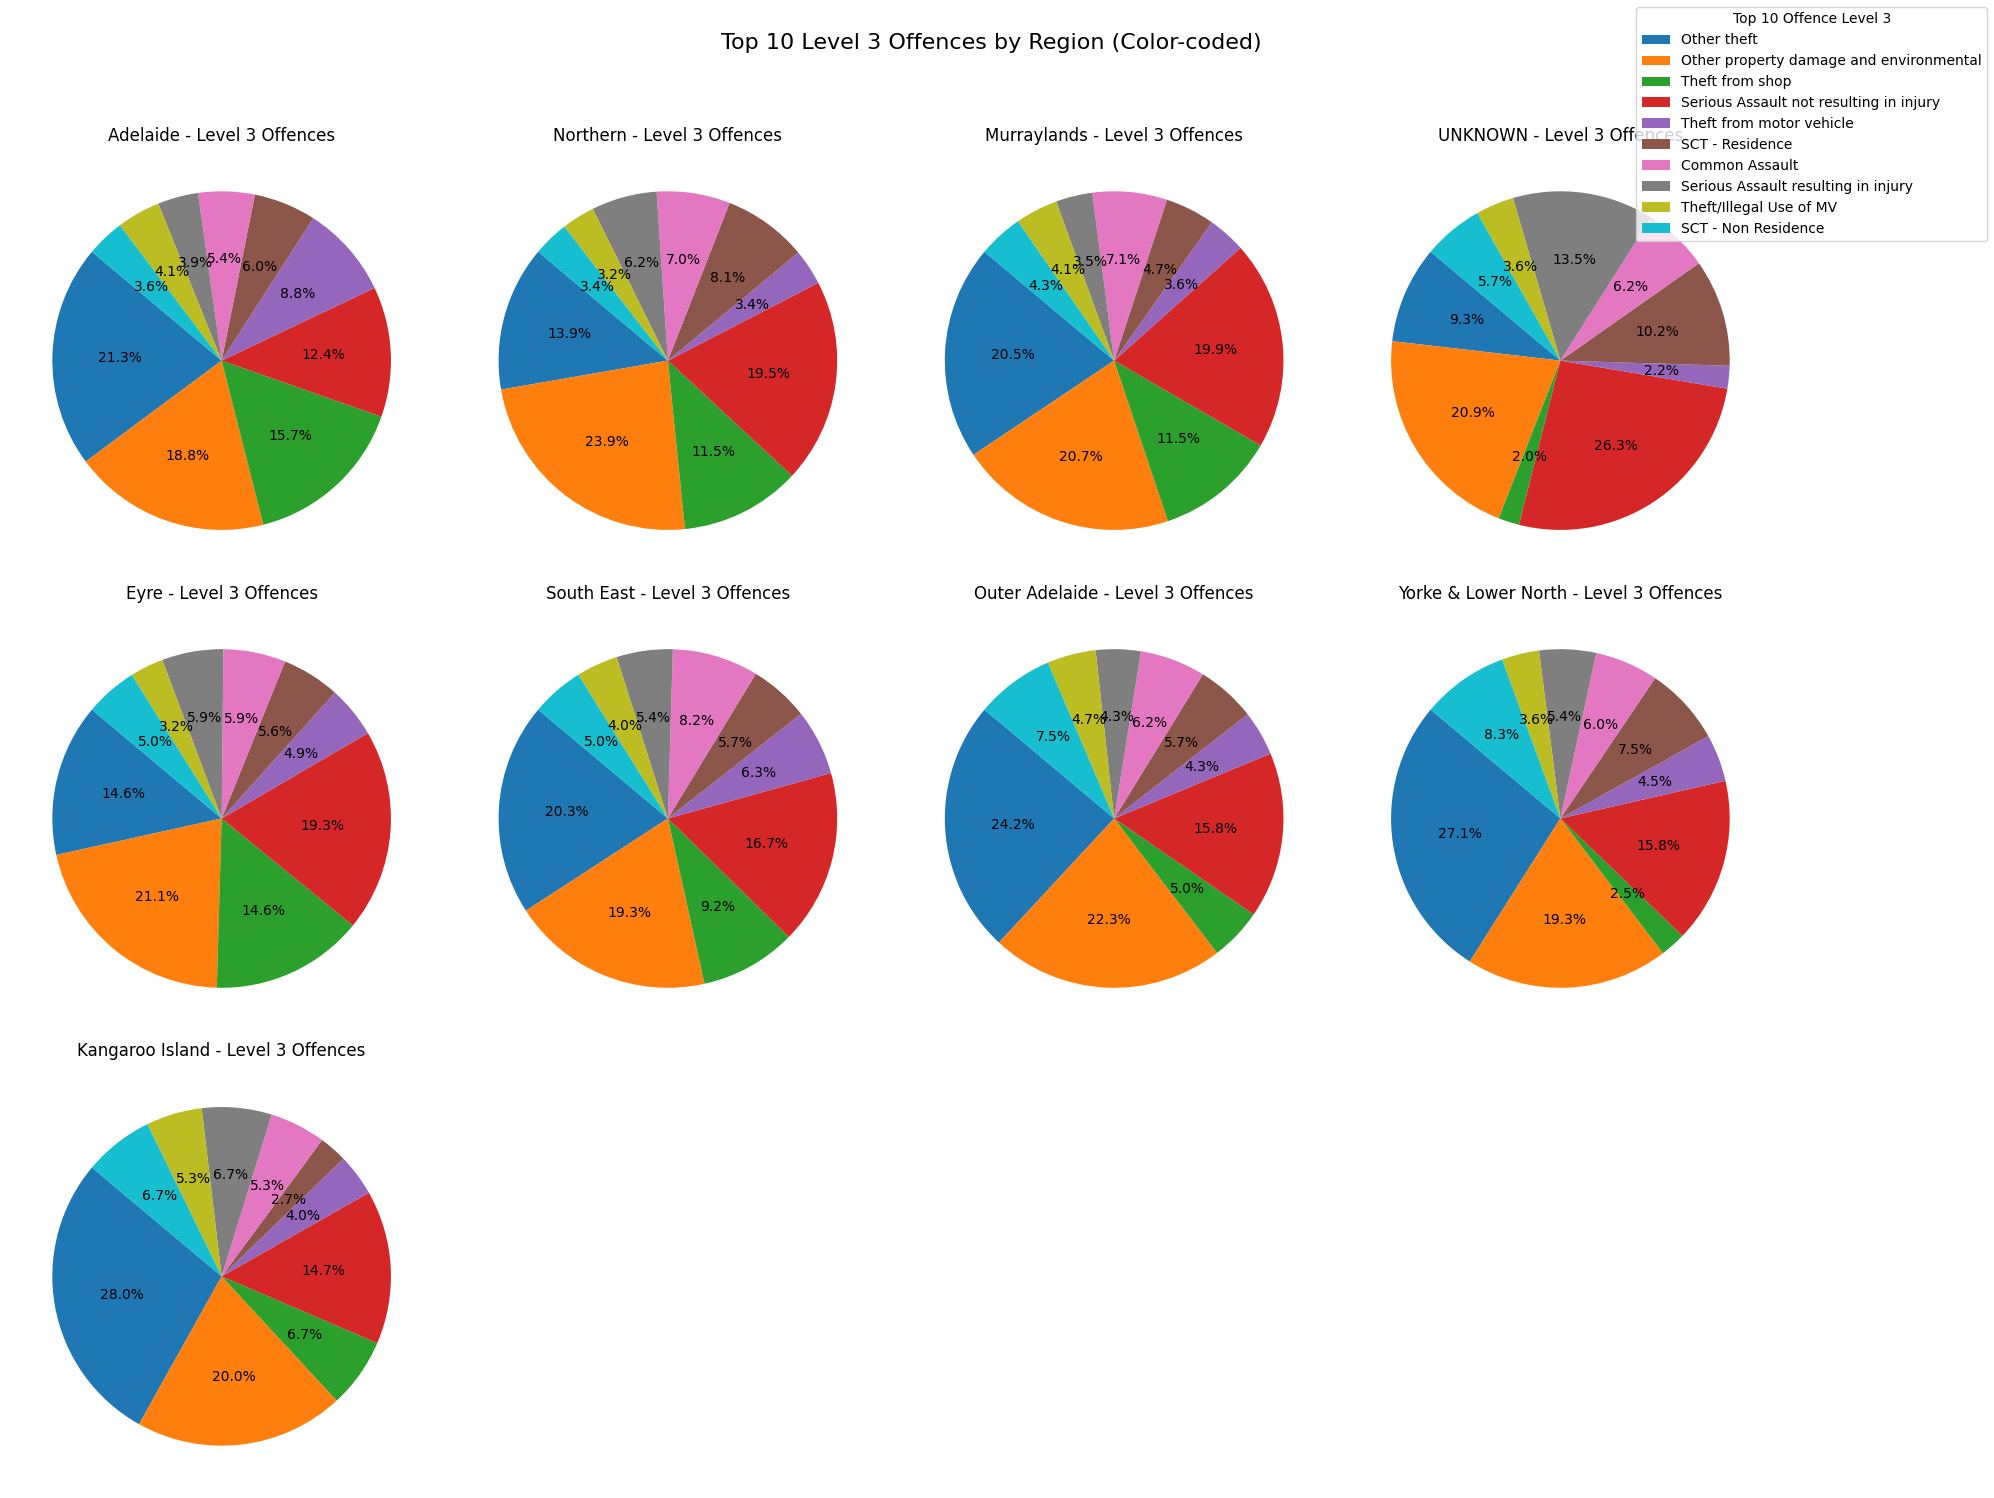

In [25]:
import math
# Use the index of region_counts to get the list of regions
regions = region_counts.index
n_regions = len(regions)

# ------------------------
# 1. Pie Charts for Level 2 Offences (color-coded, with percentages)
# ------------------------
level2_offences = data['Offence Level 2 Description'].unique()
colors2 = plt.cm.tab20.colors[:len(level2_offences)]  # color map
color_map2 = dict(zip(level2_offences, colors2))

# Dynamic grid
n_cols = 4
n_rows = math.ceil(n_regions / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
axes = axes.flatten()

for i, region in enumerate(regions):
    level2_region = data[data['Region'] == region].groupby("Offence Level 2 Description").size()
    axes[i].pie(level2_region, colors=[color_map2[x] for x in level2_region.index],
                startangle=140, autopct='%1.1f%%')
    axes[i].set_title(f"{region} - Level 2 Offences")

# Turn off any empty subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

fig.legend(level2_offences, title="Offence Level 2", loc='upper right')
plt.suptitle("Level 2 Offences by Region (Color-coded)", fontsize=16)
plt.tight_layout(rect=[0,0,0.9,0.95])
plt.show()


# ------------------------
# 2. Pie Charts for Top 10 Level 3 Offences (color-coded, with percentages)
# ------------------------
top10_level3 = data.groupby("Offence Level 3 Description").size().sort_values(ascending=False).head(10).index
colors3 = plt.cm.tab10.colors[:len(top10_level3)]
color_map3 = dict(zip(top10_level3, colors3))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
axes = axes.flatten()

for i, region in enumerate(regions):
    level3_region = data[(data['Region']==region) & (data['Offence Level 3 Description'].isin(top10_level3))]
    level3_counts = level3_region.groupby("Offence Level 3 Description").size()
    level3_counts = level3_counts.reindex(top10_level3, fill_value=0)
    axes[i].pie(level3_counts, colors=[color_map3[x] for x in level3_counts.index],
                startangle=140, autopct='%1.1f%%')
    axes[i].set_title(f"{region} - Level 3 Offences")

# Turn off any empty subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

fig.legend(top10_level3, title="Top 10 Offence Level 3", loc='upper right')
plt.suptitle("Top 10 Level 3 Offences by Region (Color-coded)", fontsize=16)
plt.tight_layout(rect=[0,0,0.9,0.95])
plt.show()

In [26]:
data[['Offence Level 1 Description','Offence Level 2 Description']]

,Offence Level 1 Description,Offence Level 2 Description
0,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL
1,OFFENCES AGAINST PROPERTY,SERIOUS CRIMINAL TRESPASS
2,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES
3,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES
4,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES
...,...,...
72631,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES
72632,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES
72633,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES
72634,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES


In [27]:
import plotly.graph_objects as go
import pandas as pd

# Group your data
grouped = data.groupby(['Offence Level 1 Description', 'Offence Level 2 Description']).size().reset_index(name='Count')

# Unique labels and mapping
level1_labels = grouped['Offence Level 1 Description'].unique().tolist()
level2_labels = grouped['Offence Level 2 Description'].unique().tolist()
labels = level1_labels + level2_labels

# Map labels to indices
label_indices = {label: i for i, label in enumerate(labels)}

# Add source and target columns
grouped['Source'] = grouped['Offence Level 1 Description'].map(label_indices)
grouped['Target'] = grouped['Offence Level 2 Description'].map(label_indices)

# Create Sankey figure
fig = go.Figure(data=[go.Sankey(
    arrangement="snap",
    node=dict(
        pad=20,
        thickness=20,
        line=dict(color="gray", width=0.5),
        label=labels,
        color="lightsteelblue",
        hovertemplate='%{label}<extra></extra>',
    ),
    link=dict(
        source=grouped['Source'],
        target=grouped['Target'],
        value=grouped['Count'],
        label=grouped['Count'], # Add labels to the links
        color="rgba(255, 182, 193, 0.6)", # Change color to light red
        hovertemplate='From %{source.label} → %{target.label}<br>Count: %{value}<extra></extra>'
    )
)])

# Layout
fig.update_layout(
    title=dict(
        text="Offence Types",
        font=dict(size=20),
        x=0.5,
        xanchor='center'
    ),
    font=dict(size=13),  # Global font size
    height=700,
    margin=dict(l=30, r=30, t=60, b=30)
)

fig.show()

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Aggregate offence count by suburb
spatial_df = data.groupby(['Suburb - Incident', 'Postcode - Incident'])['Offence count'].sum().reset_index()
spatial_df.columns = ['Suburb', 'Postcode', 'Total Offences']

# Scale and apply K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(spatial_df[['Total Offences']])
kmeans = KMeans(n_clusters=4, random_state=42)
spatial_df['Cluster'] = kmeans.fit_predict(X_scaled)


# Task
Read the shapefile from the file "/content/Suburbs_shp.zip" and display the first few rows and the information about the data.

## Unzip the file.

### Subtask:
Unzip the file.


**Reasoning**:
The current subtask is to unzip the shapefile. I will use the `zipfile` module to extract the contents of the zip file to a specified directory.



In [30]:
import zipfile
import os

zip_file_path = '/content/Suburbs_shp.zip'
extraction_dir = '/content/Suburbs_shp/'

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_dir, exist_ok=True)

# Open the zip file and extract its contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

## Read the shapefile from the unzipped folder.

### Subtask:
Read the shapefile from the unzipped folder.


**Reasoning**:
Read the shapefile into a GeoDataFrame.



In [31]:
import geopandas as gpd

shapefile_path = '/content/Suburbs_shp/Suburbs_GDA94.shp'
gdf = gpd.read_file(shapefile_path)

## Display the first few rows of the shapefile dataframe and its information.

### Subtask:
Display the first few rows of the shapefile dataframe and its information.


**Reasoning**:
Display the head and info of the dataframe to check the data structure and types.



In [32]:
display(gdf.head())
gdf.info()

,postcode,suburb,suburb_num,legalstart,shape_Leng,shape_Area,geometry
0,0872,AMATA,87206,NaT,0.258467,0.003273,"POLYGON ((131.21647 -26.11914, 131.14123 -26.1..."
1,0872,ANANGU PITJANTJATJARA YANKUNYTJATJARA,87205,NaT,16.039189,9.288721,"POLYGON ((132.97729 -25.99857, 133.05763 -25.9..."
2,0872,AYERS RANGE SOUTH,87202,2013-04-26,1.466853,0.117333,"POLYGON ((133.458 -25.99856, 133.45829 -26.004..."
3,0872,DE ROSE HILL,87201,2013-04-26,1.685683,0.167840,"POLYGON ((133.42463 -26.4087, 133.42602 -26.44..."
4,0872,IWANTJA,87209,NaT,0.143983,0.001144,"POLYGON ((133.30662 -26.9931, 133.30002 -26.99..."


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   postcode    1894 non-null   object        
 1   suburb      1894 non-null   object        
 2   suburb_num  1894 non-null   int32         
 3   legalstart  1877 non-null   datetime64[ms]
 4   shape_Leng  1894 non-null   float64       
 5   shape_Area  1894 non-null   float64       
 6   geometry    1894 non-null   geometry      
dtypes: datetime64[ms](1), float64(2), geometry(1), int32(1), object(2)
memory usage: 96.3+ KB


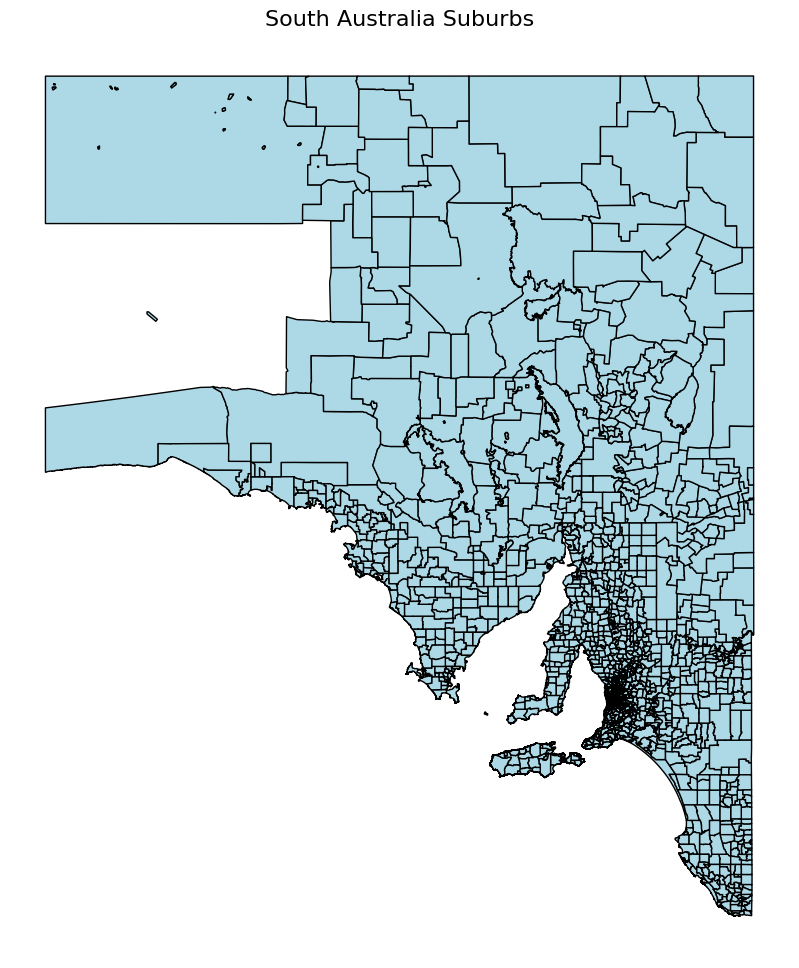

In [33]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Set a coordinate reference system (CRS)
# Check if the CRS is already set to avoid errors
if gdf.crs is None:
  gdf.set_crs(epsg=4326, inplace=True)
else:
  # Reproject if the current CRS is not EPSG:4326
  if gdf.crs != "EPSG:4326":
    gdf = gdf.to_crs(epsg=4326)


# Plot
fig, ax = plt.subplots(figsize=(12, 12))
gdf.plot(ax=ax, color='lightblue', edgecolor='black')
ax.set_title("South Australia Suburbs", fontsize=16)
ax.axis('off')
plt.show()

In [34]:
data

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count,Region,Month
0,2024-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,3,Adelaide,July
1,2024-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,SERIOUS CRIMINAL TRESPASS,SCT - Non Residence,1,Adelaide,July
2,2024-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,2,Adelaide,July
3,2024-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1,Adelaide,July
4,2024-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from shop,4,Adelaide,July
...,...,...,...,...,...,...,...,...,...
72631,2025-03-31,WOODVILLE PARK,5011,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from shop,1,Adelaide,March
72632,2025-03-31,WOODVILLE SOUTH,5011,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,1,Adelaide,March
72633,2025-03-31,WYNN VALE,5127,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft/Illegal Use of MV,1,Adelaide,March
72634,2025-03-31,NaN,UNKNOWN,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft/Illegal Use of MV,1,UNKNOWN,March


In [35]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Fill missing regions
data['Region'] = data['Region'].fillna('UNKNOWN')

# Pivot table: total offences per Level 1 type per region
offence_pivot = data.pivot_table(
    index='Region',
    columns='Offence Level 1 Description',
    values='Offence count',
    aggfunc='sum',
    fill_value=0
).reset_index()

# Standardize features for KMeans
features = offence_pivot.drop('Region', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Apply KMeans clustering (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
offence_pivot['Cluster'] = kmeans.fit_predict(X_scaled)

# Compute total offences per cluster to rank severity
# Exclude non-numeric columns before summing
cluster_totals = offence_pivot.drop('Region', axis=1).groupby('Cluster').sum().sum(axis=1).sort_values(ascending=False)


# Map clusters to High / Medium / Low priority
actions = ['High Priority', 'Medium Priority', 'Low Priority']
cluster_action = {cluster: actions[i] for i, cluster in enumerate(cluster_totals.index)}

# Assign priority to each region
offence_pivot['Priority'] = offence_pivot['Cluster'].map(cluster_action)

# Show results
result = offence_pivot[['Region', 'Cluster', 'Priority']]
print(result.to_string(index=False))

             Region  Cluster        Priority
           Adelaide        1   High Priority
               Eyre        2 Medium Priority
    Kangaroo Island        2 Medium Priority
        Murraylands        2 Medium Priority
           Northern        0    Low Priority
     Outer Adelaide        2 Medium Priority
         South East        2 Medium Priority
            UNKNOWN        0    Low Priority
Yorke & Lower North        2 Medium Priority


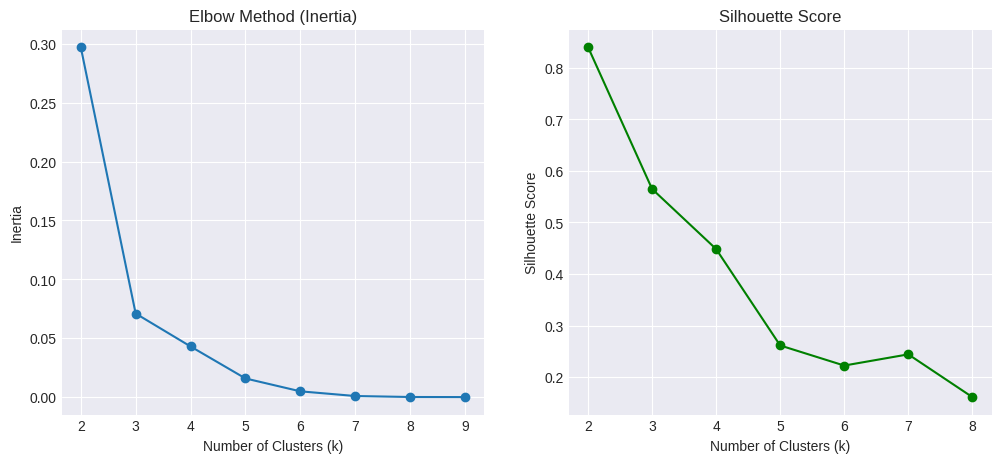

Optimal number of clusters = 2
Number of clusters (2) does not match the number of predefined actions (3). Assigning generic labels.
             Region  Cluster  Priority
           Adelaide        1 Cluster 1
               Eyre        0 Cluster 2
    Kangaroo Island        0 Cluster 2
        Murraylands        0 Cluster 2
           Northern        0 Cluster 2
     Outer Adelaide        0 Cluster 2
         South East        0 Cluster 2
            UNKNOWN        0 Cluster 2
Yorke & Lower North        0 Cluster 2


In [46]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Fill missing regions
data['Region'] = data['Region'].fillna('UNKNOWN')

# Pivot table: total offences per Level 1 type per region
offence_pivot = data.pivot_table(
    index='Region',
    columns='Offence Level 1 Description',
    values='Offence count',
    aggfunc='sum',
    fill_value=0
).reset_index()

# Standardize features
features = offence_pivot.drop('Region', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Hyperparameter tuning: try multiple K values
k_range = range(2, 10)
inertias = []
silhouettes = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)  # Distortion measure
    # Calculate silhouette score only if k is less than the number of samples
    if k < X_scaled.shape[0]:
        silhouettes.append(silhouette_score(X_scaled, labels))
    else:
        silhouettes.append(None) # Append None or NaN if silhouette is not applicable

# Plot Elbow Method
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method (Inertia)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plot Silhouette Score
plt.subplot(1,2,2)
# Filter out None values for plotting silhouette score
valid_k_range = [k for k in k_range if k < X_scaled.shape[0]]
valid_silhouettes = [s for s in silhouettes if s is not None]
plt.plot(valid_k_range, valid_silhouettes, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.show()

# Choose best k (e.g., max silhouette score from valid scores)
if valid_silhouettes:
    best_k = valid_k_range[valid_silhouettes.index(max(valid_silhouettes))]
    print(f"Optimal number of clusters = {best_k}")
else:
    best_k = 3 # Default to 3 if no valid silhouette scores
    print("Could not determine optimal number of clusters using silhouette score. Defaulting to 3.")


# Train final model with best_k
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=20)
offence_pivot['Cluster'] = kmeans_final.fit_predict(X_scaled)

# Compute total offences per cluster
cluster_totals = offence_pivot.drop('Region', axis=1).groupby('Cluster').sum().sum(axis=1).sort_values(ascending=False)

# Map clusters to priorities
actions = ['High Priority', 'Medium Priority', 'Low Priority']
# Ensure the number of actions matches the number of clusters
if len(cluster_totals) == len(actions):
    cluster_action = {cluster: actions[i] for i, cluster in enumerate(cluster_totals.index)}
else:
    # Adjust actions based on the number of clusters found
    # For simplicity, let's assign generic labels
    cluster_action = {cluster: f'Cluster {i+1}' for i, cluster in enumerate(cluster_totals.index)}
    print(f"Number of clusters ({len(cluster_totals)}) does not match the number of predefined actions ({len(actions)}). Assigning generic labels.")


offence_pivot['Priority'] = offence_pivot['Cluster'].map(cluster_action)

# Final result
result = offence_pivot[['Region', 'Cluster', 'Priority']]
print(result.to_string(index=False))

In [36]:
new_df

,Reported Date,count
0,2024-12-09,345
1,2025-03-11,332
2,2024-11-11,330
3,2024-12-30,329
4,2025-01-06,326
...,...,...
269,2024-07-14,203
270,2024-10-06,195
271,2024-09-07,190
272,2024-08-03,186


In [37]:
!pip install pmdarima

  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.2 MB)


                                     SARIMAX Results                                     
Dep. Variable:                             count   No. Observations:                  274
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -1167.005
Date:                           Sun, 17 Aug 2025   AIC                           2344.009
Time:                                   06:59:38   BIC                           2361.755
Sample:                               07-01-2024   HQIC                          2351.146
                                    - 03-31-2025                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1378      0.063      2.190      0.029       0.014       0.261
ma.L1         -0.9215      0.029    -32.019

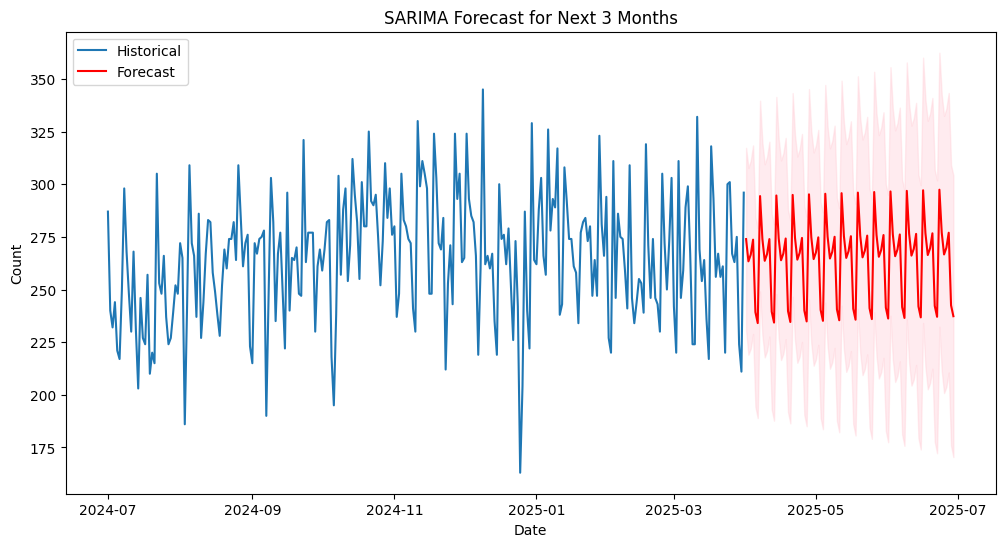

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

df = pd.DataFrame(new_df)  # your data
df['Reported Date'] = pd.to_datetime(df['Reported Date'])
df.set_index('Reported Date', inplace=True)

# Resample daily and forward-fill missing days
ts = df['count'].asfreq('D').fillna(method='ffill')

# 2. Fit SARIMA manually
# Example parameters: (p,d,q) = (1,1,1), seasonal (P,D,Q,m) = (1,1,1,7)
sarima_model = SARIMAX(ts,
                       order=(1,1,1),
                       seasonal_order=(1,1,1,7),  # weekly seasonality
                       enforce_stationarity=False,
                       enforce_invertibility=False)

results = sarima_model.fit()
print(results.summary())

# 3. Forecast next 3 months (approx 90 days)
forecast = results.get_forecast(steps=90)
forecast_df = forecast.summary_frame()

# 4. Plot forecast
plt.figure(figsize=(12,6))
plt.plot(ts, label='Historical')
plt.plot(forecast_df['mean'], label='Forecast', color='red')
plt.fill_between(forecast_df.index,
                 forecast_df['mean_ci_lower'],
                 forecast_df['mean_ci_upper'], color='pink', alpha=0.3)
plt.title('SARIMA Forecast for Next 3 Months')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()


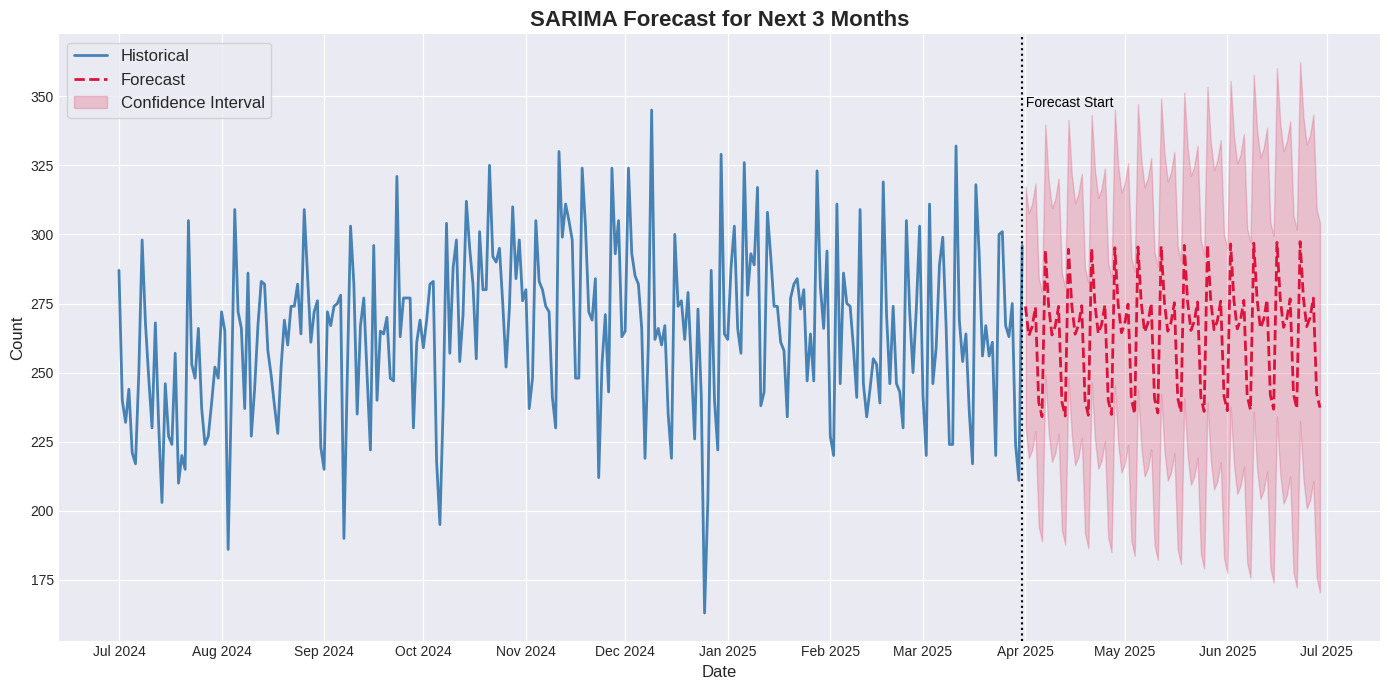

In [44]:
import matplotlib.dates as mdates

# 4. Plot forecast with improvements
plt.style.use("seaborn-v0_8-darkgrid")
plt.figure(figsize=(14,7))

# Historical
plt.plot(ts, label='Historical', color='steelblue', linewidth=2)

# Forecast
plt.plot(forecast_df['mean'], label='Forecast', color='crimson', linewidth=2, linestyle="--")

# Confidence interval
plt.fill_between(forecast_df.index,
                 forecast_df['mean_ci_lower'],
                 forecast_df['mean_ci_upper'],
                 color='crimson', alpha=0.2, label="Confidence Interval")

# Vertical line to mark forecast start
plt.axvline(ts.index[-1], color="black", linestyle=":", linewidth=1.5)
plt.text(ts.index[-1], ts.max(), " Forecast Start", va="bottom", ha="left", fontsize=10, color="black")

# Titles and labels
plt.title('SARIMA Forecast for Next 3 Months', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Improve x-axis date formatting
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Legend
plt.legend(fontsize=12, loc='upper left', frameon=True)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Best SARIMA model: order=(1, 1, 1), seasonal_order=(0, 1, 1, 7), AIC=2342.024335385479


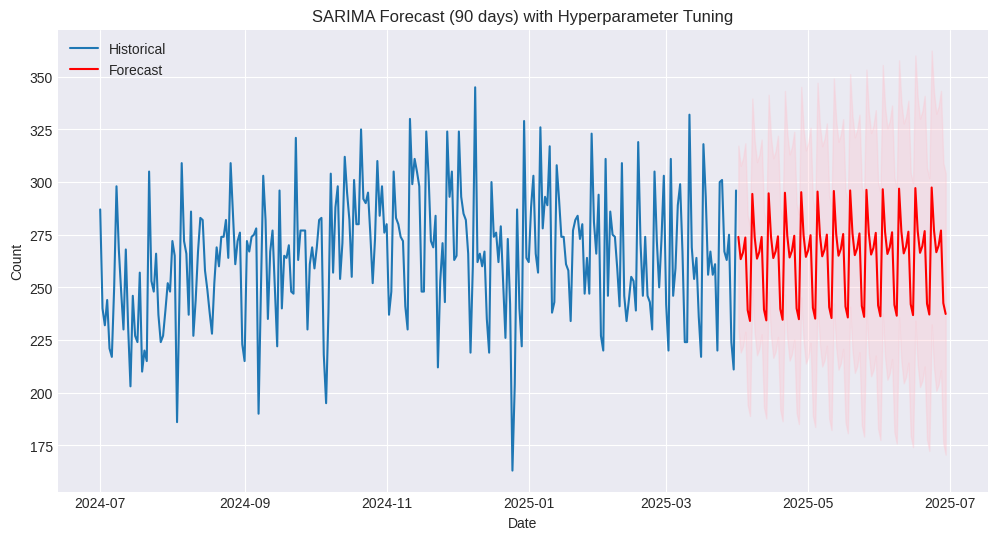

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

# Convert to time series
df = pd.DataFrame(new_df)
df['Reported Date'] = pd.to_datetime(df['Reported Date'])
df.set_index('Reported Date', inplace=True)

# Resample daily and forward-fill missing days
ts = df['count'].asfreq('D').fillna(method='ffill')

# Parameter ranges
p = d = q = range(0, 2)        # non-seasonal
P = D = Q = range(0, 2)        # seasonal
m = [7]                        # weekly seasonality

# Generate combinations
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], m[0]) for x in itertools.product(P, D, Q)]

best_aic = float("inf")
best_params = None
best_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = SARIMAX(ts,
                            order=param,
                            seasonal_order=param_seasonal,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            results = model.fit(disp=False)

            if results.aic < best_aic:
                best_aic = results.aic
                best_params = (param, param_seasonal)
                best_model = results
        except:
            continue

print(f"Best SARIMA model: order={best_params[0]}, seasonal_order={best_params[1]}, AIC={best_aic}")

# Forecast next 90 days with best model
forecast = best_model.get_forecast(steps=90)
forecast_df = forecast.summary_frame()

# Plot forecast
plt.figure(figsize=(12,6))
plt.plot(ts, label='Historical')
plt.plot(forecast_df['mean'], label='Forecast', color='red')
plt.fill_between(forecast_df.index,
                 forecast_df['mean_ci_lower'],
                 forecast_df['mean_ci_upper'], color='pink', alpha=0.3)
plt.title('SARIMA Forecast (90 days) with Hyperparameter Tuning')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()
